# k-Means Clustering on the Wine Dataset

## Introduction
k-Means Clustering is a prevalent unsupervised machine learning technique employed for partitioning data into clusters based on similarity patterns. It aims to organize data points into clusters such that individuals within the same cluster exhibit higher similarity to each other than to those in different clusters. This algorithm is notably versatile, applicable in numerous fields including market segmentation, image compression, and anomaly detection.

## k-Means Algorithm
The k-Means clustering algorithm consists of several distinct steps:

1. **Initialization**: Randomly select `k` initial centroids from the data points.
2. **Assignment**: Assign each data point to the nearest cluster centroid.
3. **Update Centroids**: Recalculate the centroids as the mean of all data points assigned to each cluster.
4. **Iteration**: Repeat the assignment and centroid update processes until the centroids stabilize (i.e., no significant changes in centroids) or a predefined number of iterations is reached.

## Advantages and Disadvantages
### Advantages
- **Simplicity**: k-Means is straightforward to understand and implement, which makes it a popular choice for clustering tasks.
- **Speed**: It operates with high computational efficiency, making it suitable for large datasets.
- **Scalability**: Performs well with datasets of varying sizes and dimensions.
- **Interpretability**: The results are easy to interpret since clusters are visually and numerically defined by centroids.

### Disadvantages
- **Sensitivity to Initialization**: The initial selection of centroids can significantly affect the final outcomes.
- **Assumes Equal Variance**: k-Means presupposes that all clusters have approximately equal variance and are spherical, which may not always apply.
- **Requires Predefined k**: The number of clusters (`k`) must be defined before the algorithm is run, which can be challenging without prior knowledge of how many clusters are ideal.

## Dataset Overview
The Wine dataset, derived from the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars, comprises 178 instances and 13 attributes including Alcohol, Malic Acid, Ash, Alkalinity of Ash, Magnesium, Total Phenols, Flavanoids, Nonflavanoid Phenols, Proanthocyanins, Color Intensity, Hue, OD280/OD315 of Diluted Wines, and Proline. These characteristics are used to explore cluster tendencies and patterns that can help in distinguishing between the different types of wine based on their chemical properties.

This dataset provides a practical example of using k-Means to understand complex and multidimensional data through clustering, offering insights into both the capabilities and limitations of the algorithm when applied to real-world data.

## Implementation

/Users/williamc1107/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


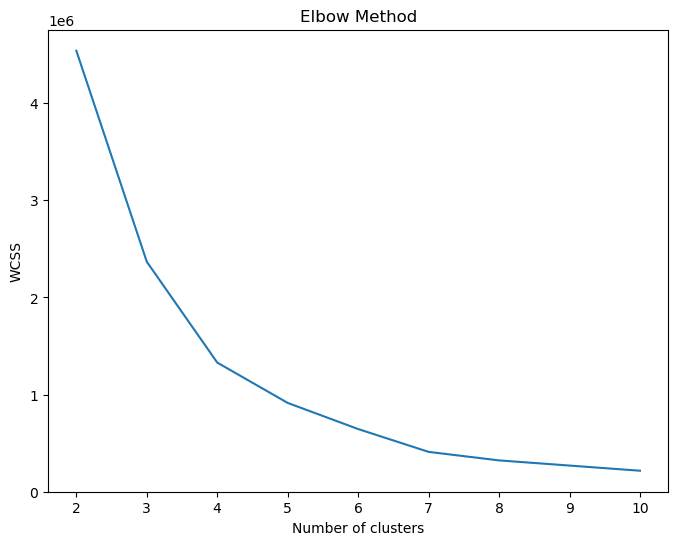

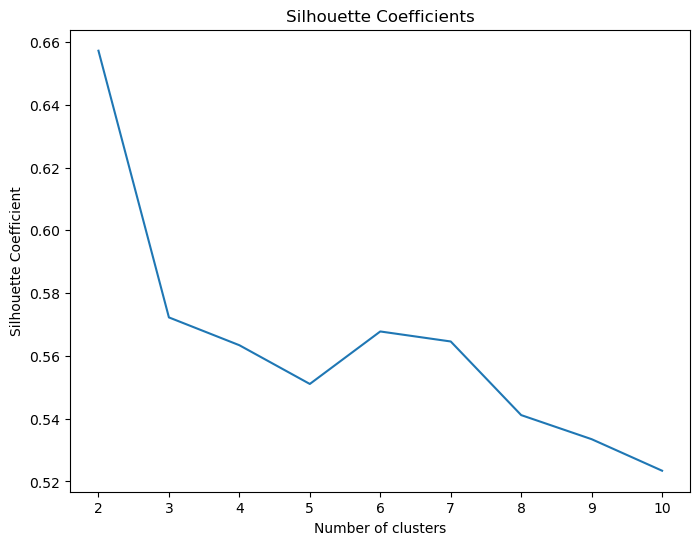

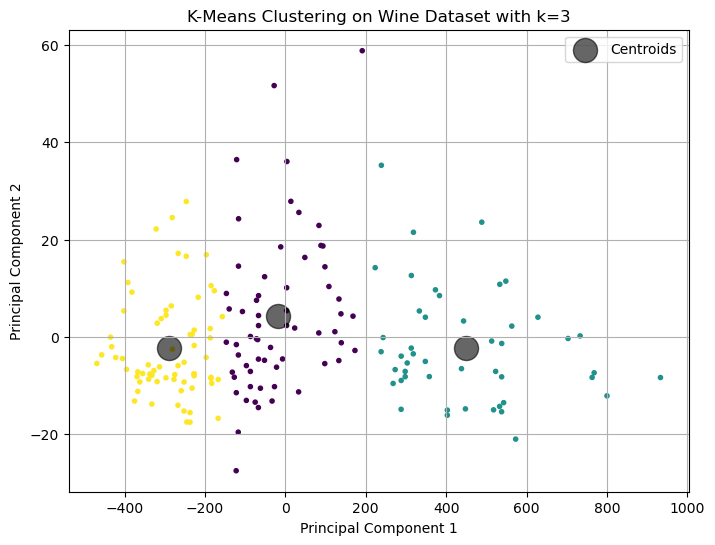

Silhouette Score for k=3: 0.5722554756855063


In [1]:
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# Load the dataset
wine = load_wine()
X = wine.data

# Reduce dimensionality using PCA
pca = PCA(2)  # reduce to two dimensions
X_reduced = pca.fit_transform(X)

# Determine the optimal number of clusters using the elbow method (optional to display)
wcss = []
silhouette_coefficients = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Choose the number of clusters and fit the KMeans model on reduced data
n_clusters = 3  # Assuming the natural division into the three different cultivars
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_reduced)

# Function to plot the clustered data
def plot_clusters(X, labels, centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6, label='Centroids')
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the clusters
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering on Wine Dataset with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

Try k = 2:

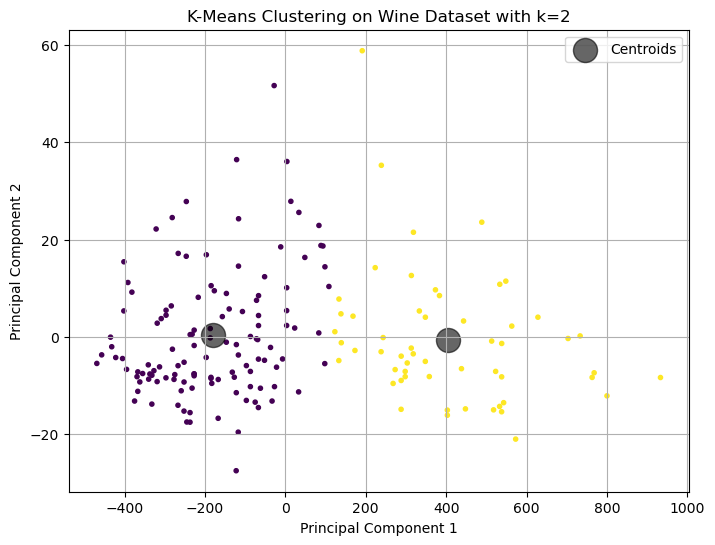

Silhouette Score for k=2: 0.6572176888364499


In [2]:
# Choose the number of clusters and fit the KMeans model on reduced data
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_reduced)

# Plot the clusters
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering on Wine Dataset with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

Try k = 5:

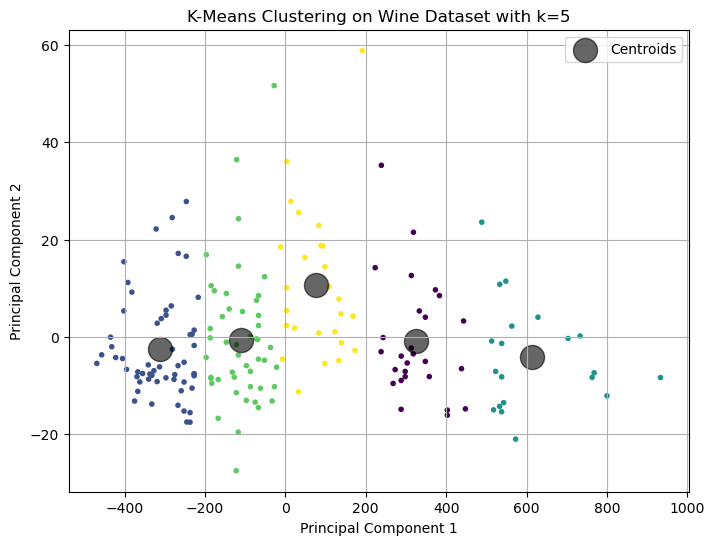

Silhouette Score for k=5: 0.5510520283196166


In [3]:
# Choose the number of clusters and fit the KMeans model on reduced data
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_reduced)

# Plot the clusters
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering on Wine Dataset with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

Try k = 10:

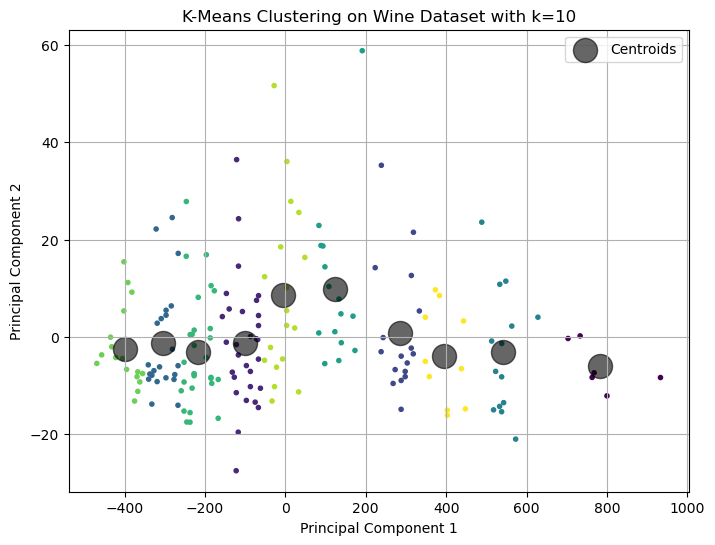

Silhouette Score for k=10: 0.5234102638396427


In [4]:
# Choose the number of clusters and fit the KMeans model on reduced data
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_reduced)

# Plot the clusters
plot_clusters(X_reduced, kmeans.labels_, kmeans.cluster_centers_, f"K-Means Clustering on Wine Dataset with k={n_clusters}")

# Calculate and print silhouette score for chosen number of clusters
silhouette_avg = silhouette_score(X_reduced, kmeans.labels_)
print(f"Silhouette Score for k={n_clusters}: {silhouette_avg}")

## Interpretation of Results
The analysis began with the application of the k-Means clustering algorithm on the wine dataset, reduced to two principal components. This approach allowed for easy visualization and interpretation of the clusters:

- **Elbow Method**: The Within-Cluster Sum of Squares (WCSS) decreased sharply from 2 to 3 clusters and then gradually flattened out. This suggests that increasing the number of clusters beyond 3 leads to diminishing returns in terms of gaining better cluster separation.

- **Silhouette Scores**: The silhouette scores provided deeper insight into the cluster quality:
  - **k=2**: Highest silhouette score of 0.657, indicating a very strong structure with well-separated clusters.
  - **k=3**: Score of 0.572, also indicating good separation but slightly less distinct than k=2.
  - **k=5 and k=10**: Lower scores of 0.551 and 0.523 respectively, suggesting that as the number of clusters increased, the distinctiveness of the clusters decreased, resulting in poorer performance in terms of cohesion and separation.

- **Visual Analysis**: The plots clearly show how the data points are grouped. With k=2, there seems to be a very strong distinction between the two groups. At k=3, which aligns with the actual number of cultivars in the dataset, the clusters appear logically placed, but the separation is not as distinct as with k=2. As k increases to 5 and 10, clusters start to overlap more visibly, which correlates with the drop in silhouette scores.

## Conclusion
The k-Means clustering analysis, augmented by PCA dimensionality reduction and visualized through the elbow method and silhouette scores, provides a robust framework for understanding the natural groupings in the wine dataset. Key conclusions include:

- **Optimal Cluster Number**: Both the elbow method and the silhouette scores suggest that fewer clusters (k=2 or k=3) are preferable for this dataset to achieve meaningful clustering without artificially forcing data into too many groups.
- **Clustering Validity**: The highest silhouette score at k=2 and a still robust score at k=3 support the hypothesis that the wine data can be effectively segmented into a small number of groups based on its chemical properties, with k=3 likely reflecting the actual differences in wine cultivars.
- **Practical Implications**: For practical applications such as customer segmentation, targeting marketing strategies, or even quality control within wine production, clustering at k=2 or k=3 provides actionable insights, allowing businesses or researchers to focus on clearly definable groups.

In summary, this analysis highlights the utility of k-Means clustering in uncovering hidden patterns and structures in complex datasets, and it underlines the importance of selecting the right number of clusters to capture the most natural and useful segmentations of the data.